
✅ Global Model Accuracy: 79.07%


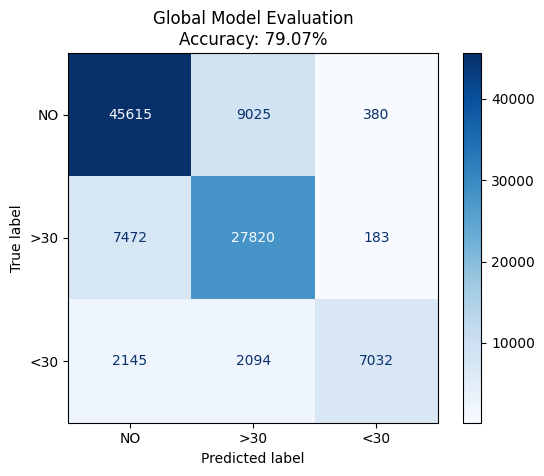

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Load the Global Model
with open("global_model.pkl", "rb") as f:
    ensemble = pickle.load(f)

models = ensemble["models"]
weights = ensemble["weights"]

# 2. Load Evaluation Data (Change path as needed)
df = pd.read_csv(r"E:\semm 8\federated_learning\federated_3\a-synthetic data\A_synthetic_diabetic_data.csv")

# 3. Quick Preprocessing
features = ['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'A1Cresult', 'max_glu_serum', 'weight']

# Minimal mapping to match model training
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Unknown/Invalid': 2}).fillna(2)
df['age'] = df['age'].map({'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}).fillna(45)

for col in features:
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col]).codes

X = df[features].astype(float)
y_true = df["readmitted"].map({"NO": 0, ">30": 1, "<30": 2}).fillna(0).astype(int)

# 4. Ensemble Prediction (Weighted Probabilities)
final_probs = np.zeros((len(X), 3))
for model, w in zip(models, weights):
    final_probs += (model.predict_proba(X) * w)

y_pred = np.argmax(final_probs, axis=1)

# 5. Print Accuracy and Show Confusion Matrix
acc = accuracy_score(y_true, y_pred) * 100
print(f"\n✅ Global Model Accuracy: {acc:.2f}%")


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO", ">30", "<30"])
disp.plot(cmap='Blues')
plt.title(f"Global Model Evaluation\nAccuracy: {acc:.2f}%")
plt.show()